In [1]:
!pip install customtkinter

You should consider upgrading via the 'C:\Users\karle\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas  as  pd
import tkinter as tk
from tkinter import font
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

C:\Users\karle\AppData\Local\Temp\ipykernel_9544\2465449494.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas  as  pd


In [3]:
data = pd.read_csv("Student_Mental_health.csv")

In [4]:
data.dropna(inplace=True)
data.columns = data.columns.str.strip()
data["Age"] = data["Age"].astype(int)
data["Choose your gender"] = data["Choose your gender"].apply(lambda x: x.strip().lower())
data["What is your course?"] = data["What is your course?"].apply(lambda x: x.strip().lower()[:3])
data["Your current year of Study"] = data["Your current year of Study"].apply(lambda x: int(x.strip().lower()[5]))
data["What is your CGPA?"] = data["What is your CGPA?"].apply(lambda x: (float(x.strip().split()[0])+float(x.strip().split()[2]))/2)
data["Marital status"] = data["Marital status"].apply(lambda x: x.strip().lower())
data["Do you have Depression?"] = data["Do you have Depression?"].apply(lambda x: x.strip().lower())
data["Do you have Anxiety?"] = data["Do you have Anxiety?"].apply(lambda x: x.strip().lower())
data["Do you have Panic attack?"] = data["Do you have Panic attack?"].apply(lambda x: x.strip().lower())
data["Did you seek any specialist for a treatment?"] = data["Did you seek any specialist for a treatment?"].apply(lambda x: x.strip().lower())
data.drop(columns=["Timestamp"], inplace=True)

In [5]:
print(data)

    Choose your gender  Age What is your course?  Your current year of Study  \
0               female   18                  eng                           1   
1                 male   21                  isl                           2   
2                 male   19                  bit                           1   
3               female   22                  law                           3   
4                 male   23                  mat                           4   
..                 ...  ...                  ...                         ...   
96              female   21                  bcs                           1   
97                male   18                  eng                           2   
98              female   19                  nur                           3   
99              female   23                  pen                           4   
100               male   20                  bio                           2   

     What is your CGPA? Marital status 

In [6]:
uni = list(data['What is your course?'].unique())
print(uni)
unid = {}
for i in uni:
    unid[i] = uni.index(i)
print(unid)

['eng', 'isl', 'bit', 'law', 'mat', 'pen', 'bcs', 'hum', 'irk', 'psy', 'ken', 'acc', 'enm', 'mar', 'koe', 'ban', 'bus', 'kir', 'usu', 'taa', 'ala', 'bio', 'ben', 'it', 'cts', 'eco', 'mhs', 'mal', 'kop', 'com', 'dip', 'rad', 'fiq', 'nur']
{'eng': 0, 'isl': 1, 'bit': 2, 'law': 3, 'mat': 4, 'pen': 5, 'bcs': 6, 'hum': 7, 'irk': 8, 'psy': 9, 'ken': 10, 'acc': 11, 'enm': 12, 'mar': 13, 'koe': 14, 'ban': 15, 'bus': 16, 'kir': 17, 'usu': 18, 'taa': 19, 'ala': 20, 'bio': 21, 'ben': 22, 'it': 23, 'cts': 24, 'eco': 25, 'mhs': 26, 'mal': 27, 'kop': 28, 'com': 29, 'dip': 30, 'rad': 31, 'fiq': 32, 'nur': 33}


In [7]:
data.replace({"male": 0, "female": 1}, inplace=True)
data.replace(unid, inplace=True)
data.replace({"yes": 0, "no": 1}, inplace=True)

C:\Users\karle\AppData\Local\Temp\ipykernel_9544\3437710911.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({"male": 0, "female": 1}, inplace=True)
C:\Users\karle\AppData\Local\Temp\ipykernel_9544\3437710911.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace(unid, inplace=True)
C:\Users\karle\AppData\Local\Temp\ipykernel_9544\3437710911.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infe

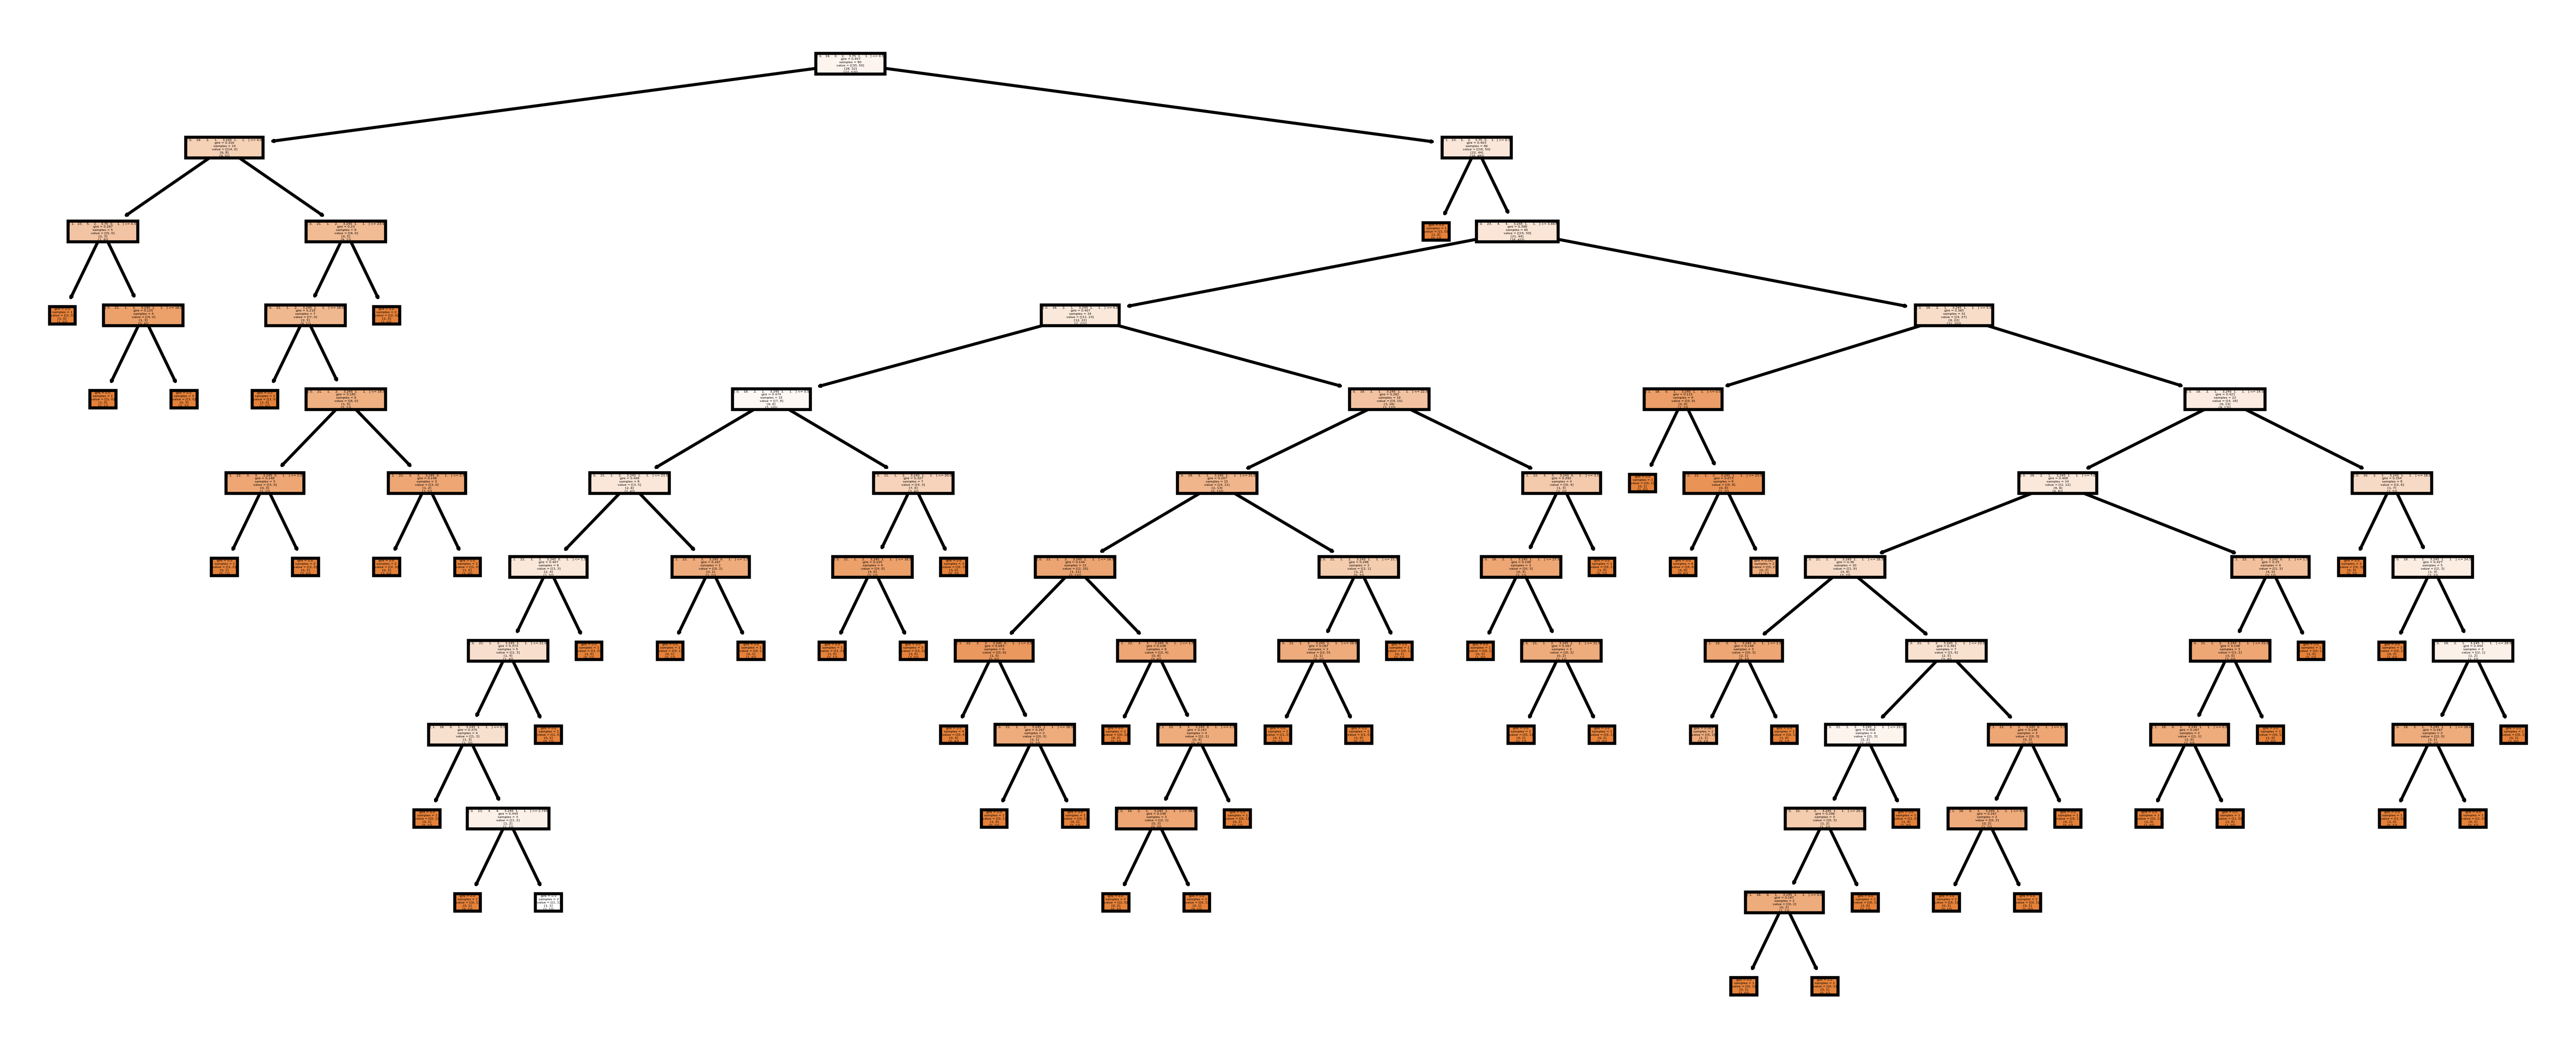

In [8]:
A = data.drop(columns=['Do you have Depression?',  'Do you have Anxiety?',  'Do you have Panic attack?'], axis = 1)
B = data[['Do you have Depression?',  'Do you have Anxiety?',  'Do you have Panic attack?']]

a_train, a_test, b_train, b_test = train_test_split(A,B, test_size = 0.2, random_state = 42)
dtree = DecisionTreeClassifier()
dtree = dtree.fit(a_train, b_train)
predict = dtree.predict(a_test)
A=A.to_numpy()
B=B.to_numpy()

fig, axes = plt.subplots(figsize = (15,6),dpi=400)
tree.plot_tree(dtree,feature_names = A,class_names=B,filled=True)
plt.show()

In [12]:
from tkinter import *
import customtkinter as c

root = c.CTk()
root.title("HOPE")

vscrollbar = Scrollbar(master=root, orient=VERTICAL)
vscrollbar.pack(fill=Y, side=RIGHT, expand=FALSE)

title_label = c.CTkLabel(master=root, text="HOPE", font=c.CTkFont(family="Helvetica", size=16))
title_label = c.CTkLabel(master=root, text="Holistic Outlook for Psychological Evaluation", font=c.CTkFont(family="Helvetica", size=16))
title_label.pack(padx = 15, pady = 15)

age_label = c.CTkLabel(master=root, text="Age:", font=c.CTkFont(family="Helvetica", size=12))
age_label.pack()
age_entry = c.CTkEntry(master=root)
age_entry.pack()

gnd_label = c.CTkLabel(master=root, text="Gender (m/f):", font=c.CTkFont(family="Helvetica", size=12))
gnd_label.pack()
gnd_entry = c.CTkEntry(master=root)
gnd_entry.pack()

crs_label = c.CTkLabel(master=root, text="Course:", font=c.CTkFont(family="Helvetica", size=12))
crs_label.pack()
crs_entry = c.CTkEntry(master=root)
crs_entry.pack()

yos_label = c.CTkLabel(master=root, text="Year of Study:", font=c.CTkFont(family="Helvetica", size=12))
yos_label.pack()
yos_entry = c.CTkEntry(master=root)
yos_entry.pack()

gpa_label = c.CTkLabel(master=root, text="GPA:", font=c.CTkFont(family="Helvetica", size=12))
gpa_label.pack()
gpa_entry = c.CTkEntry(master=root)
gpa_entry.pack()

mstat_label = c.CTkLabel(master=root, text="Marital Status (y/n):", font=c.CTkFont(family="Helvetica", size=12))
mstat_label.pack()
mstat_entry = c.CTkEntry(master=root)
mstat_entry.pack()

spc_label = c.CTkLabel(master=root, text="Specialist Treatment (y/n):", font=c.CTkFont(family="Helvetica", size=12))
spc_label.pack()
spc_entry = c.CTkEntry(master=root)
spc_entry.pack()

def values():
    age =  int(age_entry.get())
    gnd = {"m": 0, "f": 1}.get(gnd_entry.get().strip().lower()[:3])
    crs = unid.get(crs_entry.get().strip().lower()[:3])
    yos = int(yos_entry.get())
    gpa = float(gpa_entry.get())
    mstat = {"y":0,"n":1}.get(mstat_entry.get().strip().lower()[:3])
    spc = {"y":0,"n":1}.get(spc_entry.get().strip().lower()[:3])
    Prediction_result = ('Predict disorder: ', dtree.predict([[age, gnd, crs, yos, gpa, mstat, spc]]))
    ans = "Diagnosis\n"
    if Prediction_result[1][0][0]==0:
        ans += "Depression Prediction = +ve"
    elif Prediction_result[1][0][0]==1:
        ans += "Depression Prediction = -ve"
    if Prediction_result[1][0][1]==0:
        ans += "\nAnxiety Prediction = +ve"
    elif Prediction_result[1][0][1]==1:
        ans += "\nAnxiety Prediction = -ve"
    if Prediction_result[1][0][2]==0:
        ans += "\nPanic Attack Prediction = +ve"
    elif Prediction_result[1][0][2]==1:
        ans += "\nPanic Attack Prediction = -ve"
    label_Prediction = c.CTkLabel(master=root, text=ans, font=c.CTkFont(size=15))
    label_Prediction.pack(padx = 15, pady = 15)

button = c.CTkButton(master=root, text='Predict disorder',command=values)
button.pack(padx = 15, pady = 15)

'''
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

figure = plt.Figure(figsize=(5,4), dpi=100)
ax = figure.add_subplot(111)
ax.scatter(data['Age'].astype(int),data['Do you have Depression?'].astype(int), color = 'r')
scatter = FigureCanvasTkAgg(figure, root)
scatter.get_tk_widget().pack()
ax.legend(['Age'])
ax.set_xlabel('Disorders')
ax.set_title('Disorder')
'''

root.mainloop()